In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from pprint import pprint

from utils.dataloader import gen_dataloader
from utils.model_manager import Manager
from models.cnn import LW60
from config.config import TransformParam, ConfDataloader

## dataloader

In [2]:
list_dir = [
    "./test/test_imgs/img/bike/",
    "./test/test_imgs/img/car/"]
list_label = ["bike", "car"]

dataloader, label_num_dict = gen_dataloader(
    data_dirs=list_dir, 
    labels=list_label, 
    test_size=0.2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


numed_label: 0


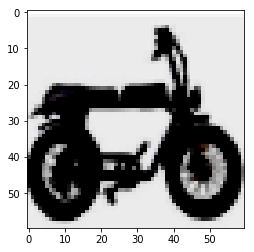

In [3]:
x, y = dataloader.dataset.__getitem__(index=0)

print(f"numed_label: {y}")
plt.imshow(x.numpy().transpose((1, 2, 0)))

In [4]:
dataloader.data_num_all()

{'train': 12, 'test': 4}

## model

In [5]:
model = LW60(
    d_params={
        "dropout_feature": 0.3,
        "dropout_classifier": 0.3,
        "class_num": len(label_num_dict.keys())})

In [6]:
model.model_descriptions()

{'name': 'LW60',
 'params': {'dropout_feature': 0.3, 'dropout_classifier': 0.3, 'class_num': 2}}

## prepare manager and train model

In [7]:
manager = Manager(model=model, label_num_dict=label_num_dict)
manager.train(num_epochs=100, dataloader=dataloader, print_epoch_step=int(10))

Epoch:10/100 ============
    Mode: train, Loss: 0.687, Acc: 0.667
    Mode: test, Loss: 0.693, Acc: 0.5
Epoch:20/100 ============
    Mode: train, Loss: 0.69, Acc: 0.583
    Mode: test, Loss: 0.692, Acc: 0.5
Epoch:30/100 ============
    Mode: train, Loss: 0.688, Acc: 0.75
    Mode: test, Loss: 0.691, Acc: 0.75
Epoch:40/100 ============
    Mode: train, Loss: 0.686, Acc: 0.833
    Mode: test, Loss: 0.69, Acc: 0.75
Epoch:50/100 ============
    Mode: train, Loss: 0.685, Acc: 0.917
    Mode: test, Loss: 0.689, Acc: 0.75
Epoch:60/100 ============
    Mode: train, Loss: 0.693, Acc: 0.417
    Mode: test, Loss: 0.688, Acc: 0.75
Epoch:70/100 ============
    Mode: train, Loss: 0.685, Acc: 0.75
    Mode: test, Loss: 0.687, Acc: 0.75
Epoch:80/100 ============
    Mode: train, Loss: 0.686, Acc: 0.583
    Mode: test, Loss: 0.686, Acc: 0.75
Epoch:90/100 ============
    Mode: train, Loss: 0.685, Acc: 0.583
    Mode: test, Loss: 0.684, Acc: 0.75
Epoch:100/100 ============
    Mode: train, Loss: 0.

In [8]:
manager.training_result

{'start': '2021-12-30 17:43:42',
 'model_descriptions': {'name': 'LW60',
  'params': {'dropout_feature': 0.3,
   'dropout_classifier': 0.3,
   'class_num': 2}},
 'scores': [{'train_loss': 0.697,
   'train_acc': 0.25,
   'test_loss': 0.694,
   'test_acc': 0.5},
  {'train_loss': 0.697,
   'train_acc': 0.333,
   'test_loss': 0.694,
   'test_acc': 0.5},
  {'train_loss': 0.695,
   'train_acc': 0.417,
   'test_loss': 0.694,
   'test_acc': 0.5},
  {'train_loss': 0.685,
   'train_acc': 0.667,
   'test_loss': 0.694,
   'test_acc': 0.5},
  {'train_loss': 0.691,
   'train_acc': 0.417,
   'test_loss': 0.694,
   'test_acc': 0.5},
  {'train_loss': 0.693,
   'train_acc': 0.417,
   'test_loss': 0.694,
   'test_acc': 0.5},
  {'train_loss': 0.692,
   'train_acc': 0.583,
   'test_loss': 0.694,
   'test_acc': 0.5},
  {'train_loss': 0.691,
   'train_acc': 0.667,
   'test_loss': 0.694,
   'test_acc': 0.25},
  {'train_loss': 0.691,
   'train_acc': 0.583,
   'test_loss': 0.693,
   'test_acc': 0.5},
  {'train_

## save and load model weight data

In [9]:
SAVE_FILE_NAME = "LW60_test"
manager.save_weight(fname=SAVE_FILE_NAME)

In [10]:
next_manager = Manager(model=model, label_num_dict=label_num_dict)
next_manager.load_weight(fname=SAVE_FILE_NAME)

## prediction

In [11]:
TARGET_IMG_PATH = "./test/test_imgs/img/bike/bike_01.jpg"
next_manager.predict(TARGET_IMG_PATH)

'bike'